# Dataset (generation)

Generate sample trajectories for [0.725, 0.825]x[0.725, 0.825] region using REM labels

In [1]:
import numpy
import chaos

from matplotlib import pyplot as plt
from matplotlib import colormaps

In [2]:
# Load data

# y == 1 -- chaotic
# y == 0 -- regular

X = numpy.fromfile('./data/X_rem.npy').reshape(-1, 2)
y = numpy.fromfile('./data/y_rem.npy')

X.shape, y.shape

((2901045, 2), (2901045,))

In [3]:
# Set ids of regular and chaotic

id_regular, *_ = numpy.where(y == 0.0)
id_chaotic, *_ = numpy.where(y == 1.0)

id_regular.shape, id_chaotic.shape

((2164548,), (736497,))

In [4]:
# Sample ids 

seed = numpy.random.seed(42)

size = 10**4

select_regular = numpy.random.choice(id_regular, size=size, replace=False)
select_chaotic = numpy.random.choice(id_chaotic, size=size, replace=False)

select_regular.shape, select_chaotic.shape

((10000,), (10000,))

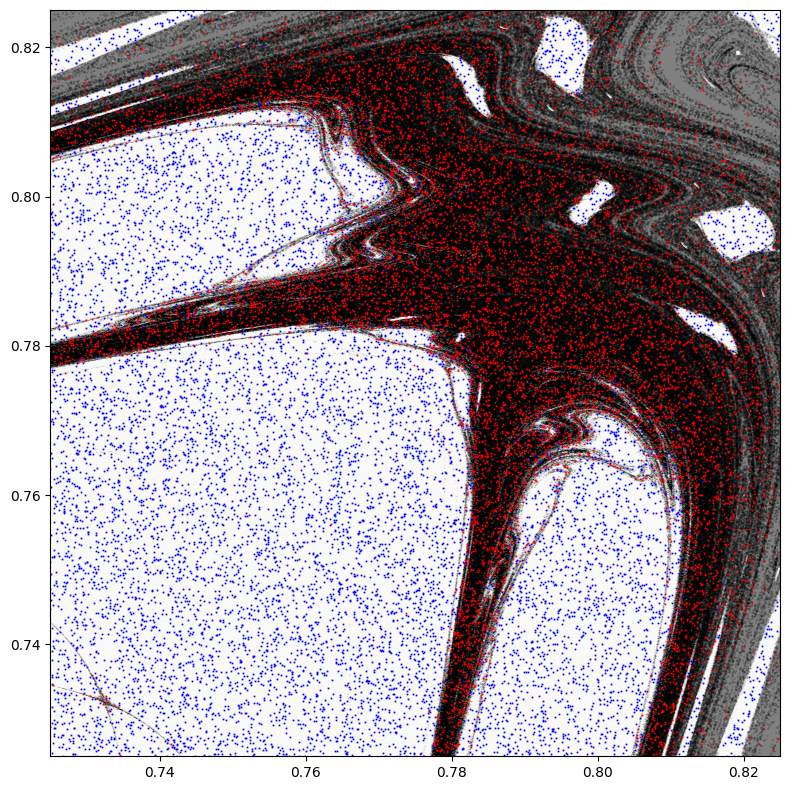

In [5]:
# Plot data

# black -- chaotic
# white -- regular
# grey  -- unbounded

cmap = colormaps.get_cmap('gray_r')
cmap.set_bad(color='gray')
plt.figure(figsize=(8, 8))
plt.gca().set_facecolor('gray')
plt.scatter(*X.T, c=y, cmap=cmap, s=0.01)
plt.scatter(*X[select_regular].T, color='blue', s=0.2, marker='x')
plt.scatter(*X[select_chaotic].T, color='red', s=0.2, marker='x')
plt.xlim(0.725, 0.825)
plt.ylim(0.725, 0.825)
plt.tight_layout()
plt.show()

In [6]:
# Generate orbits

n = 512
k = numpy.array([0.5, 0.0])

orbit_regular = chaos.table(n - 1, k, X[select_regular])
orbit_chaotic = chaos.table(n - 1, k, X[select_chaotic])

orbit_regular.shape, orbit_chaotic.shape

((10000, 512, 2), (10000, 512, 2))

In [7]:
# Set data

data_X = numpy.vstack([orbit_regular, orbit_chaotic])
data_y = numpy.vstack([y[select_regular], y[select_chaotic]])

data_X.shape, data_y.shape

((20000, 512, 2), (2, 10000))

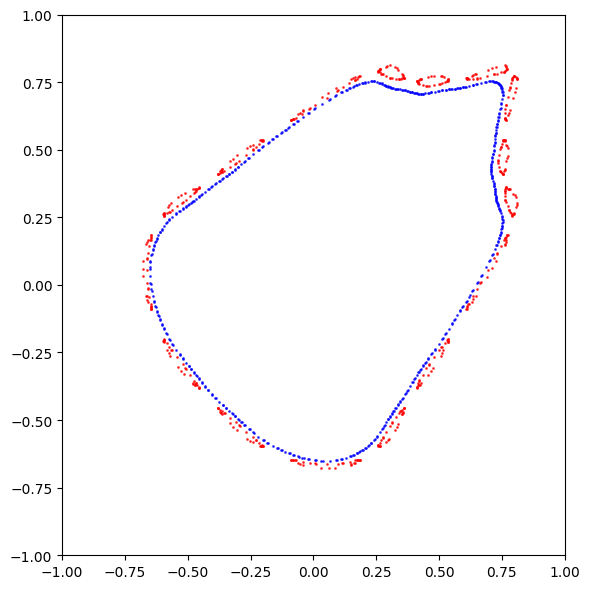

In [8]:
# Plot a random orbit for each kind

plt.figure(figsize=(6, 6))
plt.scatter(*orbit_regular[numpy.random.choice(range(len(orbit_regular)))].T, color='blue', alpha=0.7, s=1)
plt.scatter(*orbit_chaotic[numpy.random.choice(range(len(orbit_chaotic)))].T, color='red', alpha=0.7, s=1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()